## Sebelumnya kita akan memanggil kode gamepad untuk menghubungkan dengan controller 

In [2]:
from jetbot import Robot
import traitlets
import ipywidgets.widgets as widgets

controller = widgets.Controller(index=0)  # ganti dengan indeks pengontrol Anda
display(controller)
robot = Robot()


Controller()

# Membuat dan Menampilkan widget Gambar

Pertama, mari kita tampilkan widget ``Image`` yang akan kita gunakan untuk menampilkan umpan kamera langsung kita. Kita akan mengatur ``height`` dan ``width`` menjadi hanya 300 piksel sehingga tidak memakan terlalu banyak ruang.

> FYI: Tinggi dan lebar hanya mempengaruhi rendering di sisi browser, bukan resolusi gambar asli sebelum transportasi jaringan dari robot ke browser.


In [3]:
image = widgets.Image(format='jpeg', width=300, height=300)

display(image)

Image(value=b'', format='jpeg', height='300', width='300')

# Membuat instance kamera

Nah, saat ini belum ada gambar yang ditampilkan, karena kita belum menetapkan nilainya. Kita dapat melakukannya dengan membuat kelas ``Camera`` dan melampirkan atribut ``value`` kamera ke atribut ``value dari gambar.

Pertama, mari kita buat instance kamera, kita panggil metode ``instance`` yang akan membuat kamera baru jika belum dibuat. Jika dulu sudah ada, cara ini akan mengembalikan kamera yang ada.

In [4]:
from jetbot import Camera

camera = Camera.instance()

### Menghubungkan kamera ke Image widget
Kelas kamera kita saat ini hanya menghasilkan nilai dalam format BGR8 (biru, hijau, merah, 8bit), sedangkan widget gambar kita menerima nilai dalam format *JPEG* terkompresi. Untuk menghubungkan kamera ke gambar, kita perlu memasukkan fungsi ``bgr8_to_jpeg``

In [5]:
from jetbot import bgr8_to_jpeg

camera_link = traitlets.dlink((camera, 'value'), (image, 'value'), transform=bgr8_to_jpeg)

untuk memudahkan kita akan membagi jupyter lab seperti gambar berikut
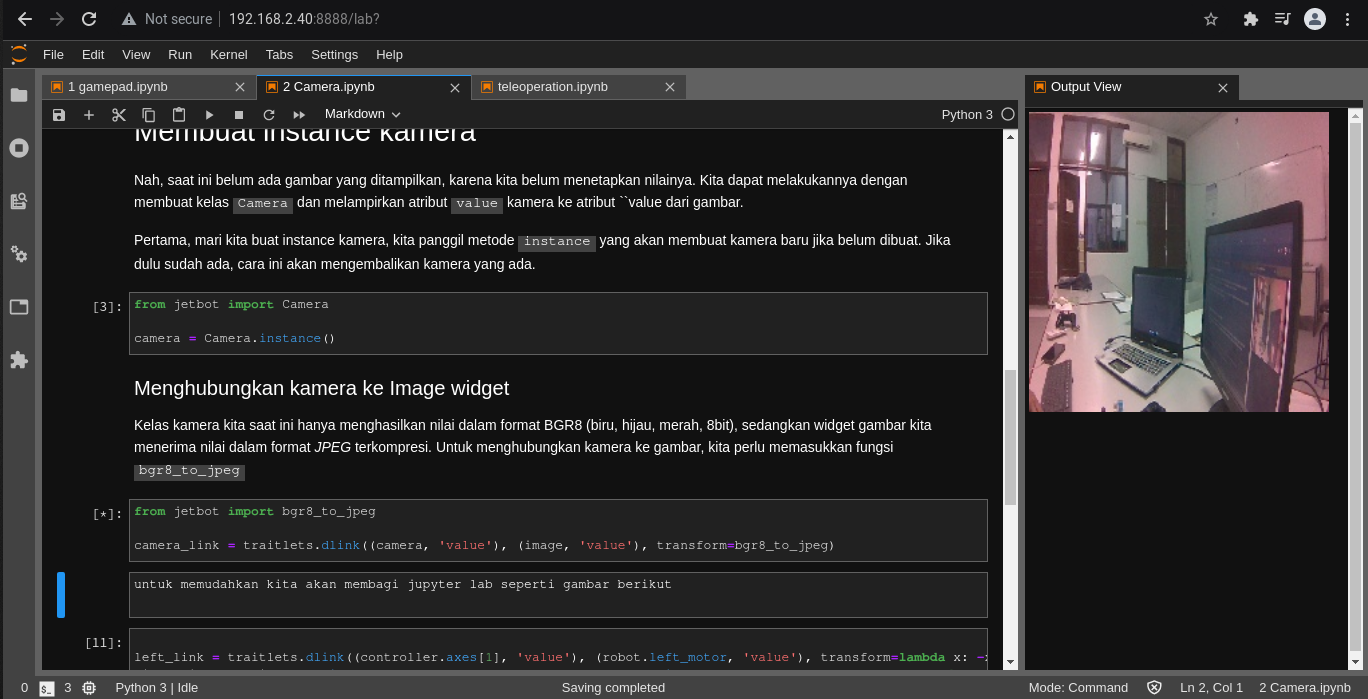

In [10]:
left_link = traitlets.dlink((controller.axes[1], 'value'), (robot.left_motor, 'value'), transform=lambda x: -x)
right_link = traitlets.dlink((controller.axes[3], 'value'), (robot.right_motor, 'value'), transform=lambda x: -x)
camera_link = traitlets.dlink((camera, 'value'), (image, 'value'), transform=bgr8_to_jpeg)


dengan kode di atas kita telah berhasil menghubungkan gamepad dengan motor dan kamera

## Simpan foto dengan tombol gamepad

Sekarang, Kita ingin dapat menyimpan beberapa gambar dari robot. Mari kita buat perintah tombol B  (indeks 1) menyimpan snapshot dari gambar langsung saat ini. Kita akan menyimpan gambar di direktori ``foto/``, dengan nama yang  unik menggunakan paket python ``uuid`` menggunakan pengenal ``uuid1``.

In [11]:
import uuid
import subprocess

subprocess.call(['mkdir', '-p', 'foto'])

snapshot_image = widgets.Image(format='jpeg', width=300, height=300)

def save_snapshot(change):
    # simpan foto saat tombol ditekan
    if change['new']:
        file_path = 'foto/' + str(uuid.uuid1()) + '.jpg'
        
        # tulis snapshot ke file (dengan menggunakan nilai gambar kamera karena sudah dalam format JPEG)        
        with open(file_path, 'wb') as f:
            f.write(image.value)
            
        # menampilkan foto yang disimpan
        snapshot_image.value = image.value


controller.buttons[1].observe(save_snapshot, names='value')

display(widgets.HBox([image, snapshot_image]))
display(controller)

Controller(axes=(Axis(value=0.0), Axis(value=0.0), Axis(value=0.0), Axis(value=0.0), Axis(value=0.0), Axis(val…

Sebelum menutup notebook ini dan mematikan kernel Python untuk notebook, pastikan menutup koneksi kamera dengan benar sehingga dapat menggunakan kamera di notebook lain.

In [12]:
camera.stop()